# CreditOne Classification
## After running a regression model on the data and having performed EDA on the data, this jupyter notebook contains only the exercise for the Classification in an attempt to predict the likelihood of a client defaulting payment.
### Imports

In [103]:
#imports 

#import libraries
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import pylab as pl

#import other functions
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#import estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Sqrt
from math import sqrt

# Data Preparation
## I first attempted to read the modified file from my previous exercise and eliminate the ID column

In [4]:
#data
rawData = pd.read_csv(r'C:\Users\maavila\Documents\CURSO-BigData-DD\Module V\Task II\new_credit.csv', header =0)
rawData.drop(rawData.columns[0], axis=1, inplace=True)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE2
0,20000,female,University,M,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,DEFAULT,21-27
1,120000,female,University,S,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,DEFAULT,21-27
2,90000,female,University,S,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,PAYS,28-33
3,50000,female,University,M,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,PAYS,34-40
4,50000,male,University,M,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,PAYS,>55


In [5]:
rawData.shape

(30000, 19)

## Creating features and Dependent Variable for splitting the data into training and testing datasets

In [8]:
#select features and dependant variable
X = rawData.drop('DEFAULT', axis=1)
y = rawData['DEFAULT']

In [12]:
X.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
AGE2         29932 non-null object
dtypes: int64(14), object(4)
memory usage: 4.1+ MB


In [13]:
#Training Set (Feature Space: X Training)
X_train = (X[: 30000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE2
0,20000,female,University,M,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,21-27
1,120000,female,University,S,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,21-27
2,90000,female,University,S,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,28-33
3,50000,female,University,M,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,34-40
4,50000,male,University,M,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,>55


In [14]:
#Dependent Variable Training Set (y Training)
y_train = y[: 30000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 30000


0    DEFAULT
1    DEFAULT
2       PAYS
3       PAYS
4       PAYS
Name: DEFAULT, dtype: object

In [15]:
#Train and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
y_test.shape

(6000,)

# Data Preparation
# After evaluating the models required, I realized I need to re-process the original data from the previous Task

In [30]:
#data
#read file and drop ID column
rawData = pd.read_csv(r'C:\Users\maavila\Documents\CURSO-BigData-DD\Module V\Task II\default of credit card clients.csv', header =1)
rawData.drop(rawData.columns[0], axis=1, inplace=True)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## I applied the Feature Engineering that I identified in the previous task that I believe will be useful for the classification prediction

In [31]:
rawData=rawData.rename(columns = {'default payment next month':'DEFAULT'})

In [32]:
#Replacing Education values to OTHER (simplification)
#Run for 6,5 and 4
rawData.replace({"EDUCATION":{6:0}}, inplace = True)
rawData.replace({"EDUCATION":{5:0}}, inplace = True)
rawData.replace({"EDUCATION":{4:0}}, inplace = True)

## Correlation 

In [33]:
#from the PAY_n graphs it seems they are very correlated, I will try to eliminate correlated variables
corr_matrix = rawData.corr().round(decimals=3)
corr_matrix

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000,0.025,-0.245,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,...,0.294,0.296,0.290,0.195,0.178,0.210,0.203,0.217,0.220,-0.154
SEX,0.025,1.000,0.008,-0.031,-0.091,-0.058,-0.071,-0.066,-0.060,-0.055,...,-0.022,-0.017,-0.017,-0.000,-0.001,-0.009,-0.002,-0.002,-0.003,-0.040
EDUCATION,-0.245,0.008,1.000,-0.147,0.180,0.132,0.155,0.149,0.140,0.126,...,-0.021,-0.021,-0.015,-0.045,-0.042,-0.060,-0.043,-0.051,-0.056,0.066
MARRIAGE,-0.108,-0.031,-0.147,1.000,-0.414,0.020,0.024,0.033,0.033,0.036,...,-0.023,-0.025,-0.021,-0.006,-0.008,-0.004,-0.013,-0.001,-0.007,-0.024
AGE,0.145,-0.091,0.180,-0.414,1.000,-0.039,-0.050,-0.053,-0.050,-0.054,...,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
PAY_0,-0.271,-0.058,0.132,0.020,-0.039,1.000,0.672,0.574,0.539,0.509,...,0.179,0.181,0.177,-0.079,-0.070,-0.071,-0.064,-0.058,-0.059,0.325
PAY_2,-0.296,-0.071,0.155,0.024,-0.050,0.672,1.000,0.767,0.662,0.623,...,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.264
PAY_3,-0.286,-0.066,0.149,0.033,-0.053,0.574,0.767,1.000,0.777,0.687,...,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.046,-0.036,-0.036,0.235
PAY_4,-0.267,-0.060,0.140,0.033,-0.050,0.539,0.662,0.777,1.000,0.820,...,0.246,0.243,0.239,-0.009,-0.002,-0.069,-0.043,-0.034,-0.027,0.217
PAY_5,-0.249,-0.055,0.126,0.036,-0.054,0.509,0.623,0.687,0.820,1.000,...,0.272,0.270,0.263,-0.006,-0.003,0.009,-0.058,-0.033,-0.023,0.204


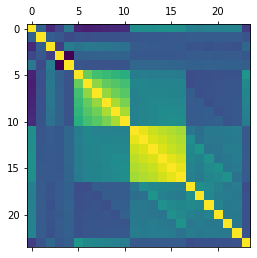

In [34]:
#The correlation shows what I had identified, Bill_Amts are highly correlated (columns 11 to 16)
plt.matshow(rawData.corr().round(decimals=3))
plt.show()

In [35]:
credit = rawData.drop(["BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis = 1, inplace = False)

## Preparing for setting up the training and testing datasets

In [58]:
#select features and dependant variable
X = credit.drop('DEFAULT', axis=1)
y = credit['DEFAULT']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
X_scaled = preprocessing.scale(X_train)

# Models

In [61]:
#Models
modelSVC = SVC(kernel='linear')
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelDTree = DecisionTreeClassifier(random_state=0, max_depth=3)

In [115]:
#Models with additional tuning
modelSVC2 = SVC(kernel='poly', decision_function_shape="ovo", degree=3)
modelKNN2 = KNeighborsClassifier(n_neighbors=4, leaf_size=50)
modelDTree2 = DecisionTreeClassifier(random_state=0, max_depth=3, criterion="entropy",max_features="sqrt")

# Support Vector Classifier

In [62]:
modelSVC.fit(X_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
modelSVC2.fit(X_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# K Nearest Neighbor

In [63]:
modelKNN.fit(X_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
modelKNN2.fit(X_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

# Decision Tree

In [64]:
modelDTree.fit(X_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [116]:
modelDTree2.fit(X_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Model Evaluation with Cross Validation

In [66]:
print(cross_val_score(modelSVC, X_scaled, y_train)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80949207 0.80786667 0.8079744 ]


In [117]:
print(cross_val_score(modelSVC2, X_scaled, y_train)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\

[0.80469271 0.80453333 0.80650753]


In [67]:
print(cross_val_score(modelKNN, X_scaled, y_train)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78762832 0.79453333 0.79490599]


In [118]:
print(cross_val_score(modelKNN2, X_scaled, y_train)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79122784 0.79946667 0.79637285]


In [68]:
print(cross_val_score(modelDTree, X_scaled, y_train)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81682442 0.8212     0.82010935]


In [119]:
print(cross_val_score(modelDTree2, X_scaled, y_train)) 

[0.82069057 0.818      0.81730897]


C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Predictions 

In [69]:
# The best scoring model was the Decision Tree
# Will scale the Testing Data as well
X_scaled_test = preprocessing.scale(X_test)

In [71]:
predictions = modelDTree.predict(X_scaled_test)

In [120]:
predictions2 = modelDTree2.predict(X_scaled_test)

In [72]:
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.068
RMSE: 0.426


In [121]:
rmse = sqrt(mean_squared_error(y_test, predictions2))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.068
RMSE: 0.425


In [74]:
# Confusion Matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[5566  304]
 [1058  572]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5870
           1       0.65      0.35      0.46      1630

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500



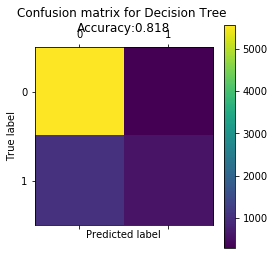

In [107]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix for Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, predictions)))
pl.ylabel('True label')
pl.xlabel('Predicted label')
pl.colorbar()
pl.show()

# REPEATING all modelling steps without Outliers 
## From the previous exercise I had identified outliers and the way to eliminate them.  As I don´t know if they impact the model in any way I decide to run the models without outliers
### Eliminate Outliers

In [78]:
# apply z score to eliminate outliers
z = np.abs(stats.zscore(rawData))

In [79]:
# Eliminating Outliers based on zcores
X_o = rawData[(z < 4.5).all(axis=1)]

In [80]:
#select features and dependant variable
X_o = credit.drop('DEFAULT', axis=1)
y_o = credit['DEFAULT']

In [81]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o)

In [82]:
X_scaled_o = preprocessing.scale(X_train_o)

# Models

In [84]:
#Models without outliers
modelSVC_o = SVC(kernel='linear')
modelKNN_o = KNeighborsClassifier(n_neighbors=5)
modelDTree_o = DecisionTreeClassifier(random_state=0, max_depth=3)

In [86]:
modelSVC_o.fit(X_scaled_o,y_train_o)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [85]:
modelKNN_o.fit(X_scaled_o,y_train_o)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
modelDTree_o.fit(X_scaled_o,y_train_o)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [88]:
print(cross_val_score(modelSVC_o, X_scaled_o, y_train_o)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80615918 0.80946667 0.80704094]


In [89]:
print(cross_val_score(modelKNN_o, X_scaled_o, y_train_o)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79402746 0.79626667 0.79383918]


In [90]:
print(cross_val_score(modelDTree_o, X_scaled_o, y_train_o)) 

C:\Users\maavila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82442341 0.81826667 0.8207761 ]


In [91]:
# The best scoring model was the Decision Tree
# Will scale the Testing Data as well
X_scaled_test_o = preprocessing.scale(X_test_o)

In [92]:
predict_o = modelDTree_o.predict(X_scaled_test_o)

In [93]:
rmse = sqrt(mean_squared_error(y_test_o, predict_o))
predRsquared = r2_score(y_test_o,predict_o)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.056
RMSE: 0.423


In [94]:
# Confusion Matrix
print(confusion_matrix(y_test_o, predict_o))
print(classification_report(y_test_o, predict_o))

[[5569  312]
 [1028  591]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5881
           1       0.65      0.37      0.47      1619

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



# NO SIGNIFICANT DIFFERENCE BY ELIMINATING OUTLIERS

###  The results of both predictions indicates that we are able to predict within 82% accuracy the clients who will not default, but not those that will default

In [ ]:
cm = confusion_matrix(y_test, pred)
pl.matshow(cm)